In [1]:
from sklearn.metrics import r2_score
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Define custom ReLU activation function
def relu_activation(x):
    return tf.keras.activations.relu(x)

In [2]:
# Charger les données de vitesse de vent à partir du fichier windSpeed.txt
wind_speed_data = pd.read_csv("windSpeed.txt", header=None, names=["Wind Speed"])

# Afficher les premières lignes des données
print(wind_speed_data.head())

# Définir les paramètres
N = 2000
NTest = 100
C = 0.0003
S = 3
L = 10

# Déduire la puissance de sortie en utilisant l'équation (1)
wind_speed_data["Power"] = C * 3 * wind_speed_data["Wind Speed"] ** 3

# Diviser les données en ensembles d'entraînement et de test
train_data = wind_speed_data.iloc[:N]
test_data = wind_speed_data.iloc[N:N+NTest]

# Séparer les caractéristiques (vitesse du vent) et les étiquettes (puissance)
X_train_pw = train_data["Wind Speed"].values.reshape(-1, 1)
y_train_pw = train_data["Power"].values.reshape(-1, 1)
X_test_pw = test_data["Wind Speed"].values.reshape(-1, 1)
y_test_pw = test_data["Power"].values.reshape(-1, 1)

# Normalizing the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_normalized_pw = scaler_X.fit_transform(X_train_pw)
y_train_normalized_pw = scaler_y.fit_transform(y_train_pw)
X_test_normalized_pw = scaler_X.transform(X_test_pw)
y_test_normalized_pw = scaler_y.transform(y_test_pw)

print("Shape of X_train_pw:", X_train_normalized_pw.shape)
print("Shape of y_train_pw:", y_train_normalized_pw.shape)
print("Shape of X_test_pw:", X_test_normalized_pw.shape)
print("Shape of y_test_pw:", y_test_normalized_pw.shape)


# Maintenant, vous pouvez construire vos régresseurs ELM et BP en utilisant ces données d'entraînement
# et les tester avec les données de test


   Wind Speed
0   10.898547
1   32.377326
2   44.032521
3   22.571923
4   30.118608
Shape of X_train_pw: (2000, 1)
Shape of y_train_pw: (2000, 1)
Shape of X_test_pw: (100, 1)
Shape of y_test_pw: (100, 1)


In [5]:
class ELMRegressor:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.random.randn(1, hidden_size)
        self.weights_hidden_output = None

    def train(self, X_train, y_train):
        # Calcul de la sortie de la couche cachée
        hidden_output = np.dot(X_train, self.weights_input_hidden) + self.bias_hidden
        hidden_output = np.maximum(hidden_output, 0)  # Fonction d'activation ReLU

        # Calcul des poids de sortie de la couche cachée
        self.weights_hidden_output = np.dot(np.linalg.pinv(hidden_output), y_train)

    def predict(self, X_test):
        hidden_output = np.dot(X_test, self.weights_input_hidden) + self.bias_hidden
        hidden_output = np.maximum(hidden_output, 0)  # Fonction d'activation ReLU
        return np.dot(hidden_output, self.weights_hidden_output)

# Utilisation de la classe ELMRegressor
input_size = 1  # Nombre d'entrées (vitesse du vent)
hidden_size = 20  # Nombre de neurones dans la couche cachée

elm_regressor = ELMRegressor(input_size, hidden_size)
elm_regressor.train(X_train_normalized_pw, y_train_normalized_pw)
elm_predictions_normalized = elm_regressor.predict(X_test_normalized_pw)
elm_predictions = scaler_y.inverse_transform(elm_predictions_normalized)

# Calculer les métriques d'évaluation
mse_pw_elm = mean_squared_error(y_test_pw, elm_predictions)
mae_pw_elm = mean_absolute_error(y_test_pw, elm_predictions)
r2_pw_elm = r2_score(y_test_pw, elm_predictions)

# Imprimer les résultats
print("Mean Squared Error (MSE):", mse_pw_elm)
print("Mean Absolute Error (MAE):", mae_pw_elm)
print("R² Score (MAE):", r2_pw_elm)


Mean Squared Error (MSE): 52.17818192185619
Mean Absolute Error (MAE): 5.72933548480371
R² Score (MAE): 0.97842258508286


In [6]:
# Define the neural network architecture with two hidden layers
model_bp = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,), activation=relu_activation),  # First hidden layer
    tf.keras.layers.Dense(10, activation=relu_activation),  # Second hidden layer
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model_bp.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_bp.fit(X_train_normalized_pw, y_train_normalized_pw, epochs=10)

# Make predictions
predictions_normalized_bp = model_bp.predict(X_test_normalized_pw)
bp_predictions = scaler_y.inverse_transform(predictions_normalized_bp)

# Calculate evaluation metrics
mse_pw_bp = mean_squared_error(y_test_pw, bp_predictions)
mae_pw_bp = mean_absolute_error(y_test_pw, bp_predictions)
r2_pw_bp = r2_score(y_test_pw, bp_predictions)

# Print the results
print("Mean Squared Error (MSE) - BP:", mse_pw_bp)
print("Mean Absolute Error (MAE) - BP:", mae_pw_bp)
print("R² Score - BP:", r2_pw_bp)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0886
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0375
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0254
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0164
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8662e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mean Squared Error (MSE) - BP: 13.393892778340591
Mean Absolute Error (MAE) - BP: 2.716425527850301
R² Score - BP: 0.9944611795354088


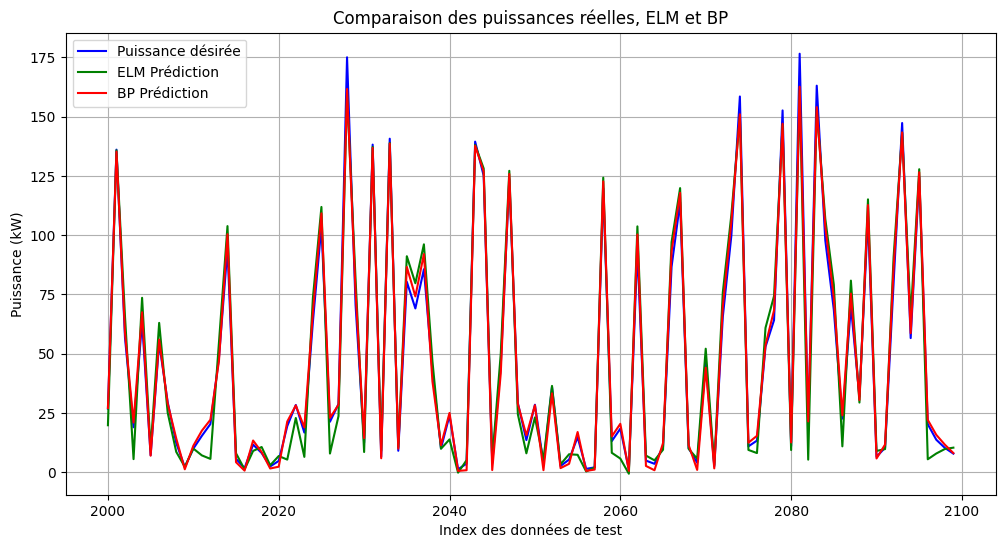

In [7]:
plt.figure(figsize=(12, 6))

# Plot actual power
plt.plot(test_data.index, y_test_pw, label='Puissance désirée', color='blue')

# Plot ELM predictions
plt.plot(test_data.index, elm_predictions, label='ELM Prédiction', color='green')

# Plot BP predictions
plt.plot(test_data.index, bp_predictions, label='BP Prédiction', color='red')

plt.xlabel('Index des données de test')
plt.ylabel('Puissance (kW)')
plt.title('Comparaison des puissances réelles, ELM et BP')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Charger les données d'irradiation et de température depuis les fichiers
irradiation_data = pd.read_csv("irradiation.txt", header=None, names=["irradiation"])
temperature_data = pd.read_csv("temperature.txt", header=None, names=["temperature"])

# Concaténer les données d'irradiation et de température
pv_data = pd.concat([temperature_data, irradiation_data], axis=1)
print(pv_data.head())

# Nombre d'exemples dans les bases de données d'entraînement et de test
N = 1500
NTest = 50

# Séparer les données en ensembles d'entraînement et de test
X_train_pv = pv_data.iloc[:N]
X_test_pv = pv_data.iloc[N:N+NTest]

# Puissance maximale du module PV dans les conditions de test standard (CTS)
P_CTS = 83  # Watts

# Séparer la sortie (puissance produite par le panneau solaire) des données d'entraînement et de test
y_train_pv = P_CTS * X_train_pv["irradiation"] / 1000 * (1 + 0.05 * (X_train_pv["temperature"] - 25))
y_test_pv = P_CTS * X_test_pv["irradiation"] / 1000 * (1 + 0.05 * (X_test_pv["temperature"] - 25))

# Remodeler y_train_pv en (1500, 1)
y_train_pv = y_train_pv.values.reshape(-1, 1)

# Remodeler y_test_pv en (50, 1)
y_test_pv = y_test_pv.values.reshape(-1, 1)

# Normalisation des données
scaler_X_pv = MinMaxScaler()
scaler_y_pv = MinMaxScaler()

X_train_normalized_pv = scaler_X_pv.fit_transform(X_train_pv)
X_test_normalized_pv = scaler_X_pv.transform(X_test_pv)
y_train_normalized_pv = scaler_y_pv.fit_transform(y_train_pv)
y_test_normalized_pv = scaler_y_pv.transform(y_test_pv)

print("Shape of X_train_pv:", X_train_normalized_pv.shape)
print("Shape of y_train_pv:", y_train_normalized_pv.shape)
print("Shape of X_test_pv:", X_test_normalized_pv.shape)
print("Shape of y_test_pv:", y_test_normalized_pv.shape)


   temperature  irradiation
0    17.463437  4180.487334
1    17.042612  3016.395079
2     6.185542  5205.793612
3    22.861472  3565.189521
4    38.709272  4857.572672
Shape of X_train_pv: (1500, 2)
Shape of y_train_pv: (1500, 1)
Shape of X_test_pv: (50, 2)
Shape of y_test_pv: (50, 1)


In [9]:
# Créer un régresseur ELM pour la prédiction de la puissance PV
elm_regressor_pv = ELMRegressor(input_size=2, hidden_size=10)

# Entraîner le régresseur ELM sur les données d'entraînement normalisées
elm_regressor_pv.train(X_train_normalized_pv, y_train_normalized_pv)

# Faire des prédictions sur les données de test normalisées
pv_predictions_normalized = elm_regressor_pv.predict(X_test_normalized_pv)

# Inverser la normalisation des prédictions
pv_predictions = scaler_y_pv.inverse_transform(pv_predictions_normalized)

# Calculer les métriques d'évaluation
mse_pv_elm = mean_squared_error(y_test_pv, pv_predictions)
mae_pv_elm = mean_absolute_error(y_test_pv, pv_predictions)
r2_pv_elm = r2_score(y_test_pv, pv_predictions)

# Imprimer les résultats
print("Mean Squared Error (MSE) - PV:", mse_pv_elm)
print("Mean Absolute Error (MAE) - PV:", mae_pv_elm)
print("R² Score - PV:", r2_pv_elm)

Mean Squared Error (MSE) - PV: 348.8303445789773
Mean Absolute Error (MAE) - PV: 14.072423245641923
R² Score - PV: 0.9939640850322777


In [10]:
# Define the neural network architecture with two hidden layers
model_pv_bp = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(2,), activation=relu_activation),  # First hidden layer
    tf.keras.layers.Dense(10, activation=relu_activation),  # Second hidden layer
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
# le taux d'apprentissage par défaut pour l'optimiseur Adam est généralement fixé à 0.001
model_pv_bp.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_pv_bp.fit(X_train_normalized_pv, y_train_normalized_pv, epochs=10)

# Make predictions
predictions_normalized_pv_bp = model_pv_bp.predict(X_test_normalized_pv)

# Inverser la normalisation des prédictions
pv_bp_predictions = scaler_y_pv.inverse_transform(predictions_normalized_pv_bp)

# Calculer les métriques d'évaluation
mse_pv_bp = mean_squared_error(y_test_pv, pv_bp_predictions)
mae_pv_bp = mean_absolute_error(y_test_pv, pv_bp_predictions)
r2_pv_bp = r2_score(y_test_pv, pv_bp_predictions)

# Imprimer les résultats
print("Mean Squared Error (MSE) - BP:", mse_pv_bp)
print("Mean Absolute Error (MAE) - BP:", mae_pv_bp)
print("R² Score - BP:", r2_pv_bp)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1178
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0262
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0113
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0073
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Mean Squared Error (MSE) - BP: 1197.256613816596
Mean Absolute Error (MAE) - BP: 23.091378212330543
R² Score - BP: 0.9792835135249996


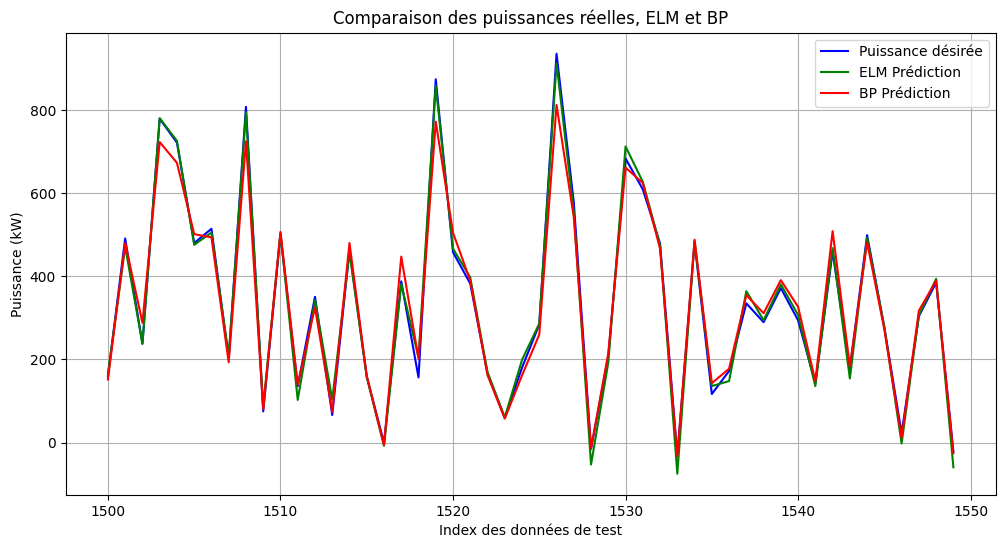

In [11]:
import matplotlib.pyplot as plt

# Créer une figure et des sous-graphiques
fig, ax = plt.subplots(figsize=(12, 6))

# Tracer les puissances désirées
ax.plot(X_test_pv.index, y_test_pv, label='Puissance désirée', color='blue')

# Tracer les prédictions de ELM
ax.plot(X_test_pv.index, pv_predictions, label='ELM Prédiction', color='green')

# Tracer les prédictions de BP
ax.plot(X_test_pv.index, pv_bp_predictions, label='BP Prédiction', color='red')

# Ajouter des légendes, des étiquettes d'axe, un titre et une grille
ax.set_xlabel('Index des données de test')
ax.set_ylabel('Puissance (kW)')
ax.set_title('Comparaison des puissances réelles, ELM et BP')
ax.legend()
ax.grid(True)

# Afficher le graphe
plt.show()


In [12]:
# Créer un DataFrame pour les mesures d'évaluation avec les colonnes inversées
evaluation_metrics = pd.DataFrame({
    'ELM': [mse_pw_elm, mae_pw_elm, r2_pw_elm, mse_pv_elm, mae_pv_elm, r2_pv_elm],
    'MLPRegressor (BP)': [mse_pw_bp, mae_pw_bp, r2_pw_bp, mse_pv_bp, mae_pv_bp, r2_pv_bp]
}, index=['Puissance éolienne (PW) - MSE', 'Puissance éolienne (PW) - MAE', 'Puissance éolienne (PW) - R²', 
          'Puissance photovoltaïque (PV) - MSE', 'Puissance photovoltaïque (PV) - MAE', 'Puissance photovoltaïque (PV) - R²'])

# Afficher le DataFrame
evaluation_metrics

,ELM,MLPRegressor (BP)
Puissance éolienne (PW) - MSE,52.178182,13.393893
Puissance éolienne (PW) - MAE,5.729335,2.716426
Puissance éolienne (PW) - R²,0.978423,0.994461
Puissance photovoltaïque (PV) - MSE,348.830345,1197.256614
Puissance photovoltaïque (PV) - MAE,14.072423,23.091378
Puissance photovoltaïque (PV) - R²,0.993964,0.979284


In [13]:
# Comparaison des performances des modèles pour la puissance éolienne (PW)
best_model_pw = 'ELM' if mse_pw_elm < mse_pw_bp else 'MLPRegressor (BP)'
print("Meilleur modèle pour la puissance éolienne (PW):", best_model_pw)

# Comparaison des performances des modèles pour la puissance photovoltaïque (PV)
best_model_pv = 'ELM' if mse_pv_elm < mse_pv_bp else 'MLPRegressor (BP)'
print("Meilleur modèle pour la puissance photovoltaïque (PV):", best_model_pv)


Meilleur modèle pour la puissance éolienne (PW): MLPRegressor (BP)
Meilleur modèle pour la puissance photovoltaïque (PV): ELM
